<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  100 non-null    int64
 1   time        100 non-null    int64
 2   WWWusage    100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


<AxesSubplot:>

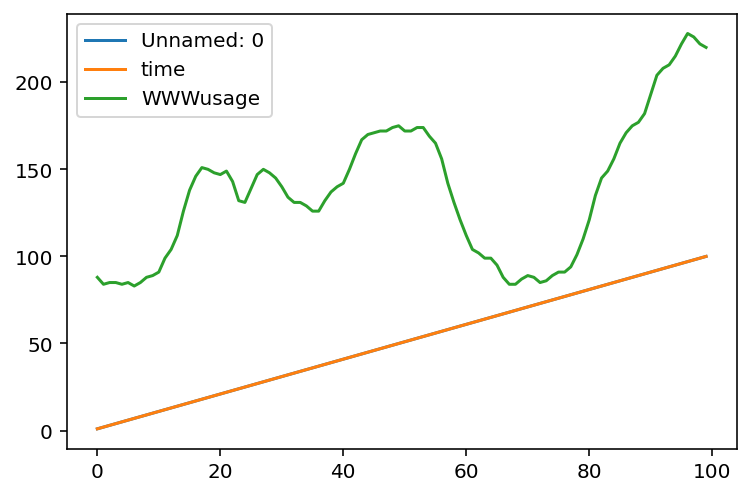

In [4]:
import pandas as pd
df = pd.read_csv(r'./data/WWWusage.csv')
df.info()

df.plot()






<AxesSubplot:xlabel='time'>

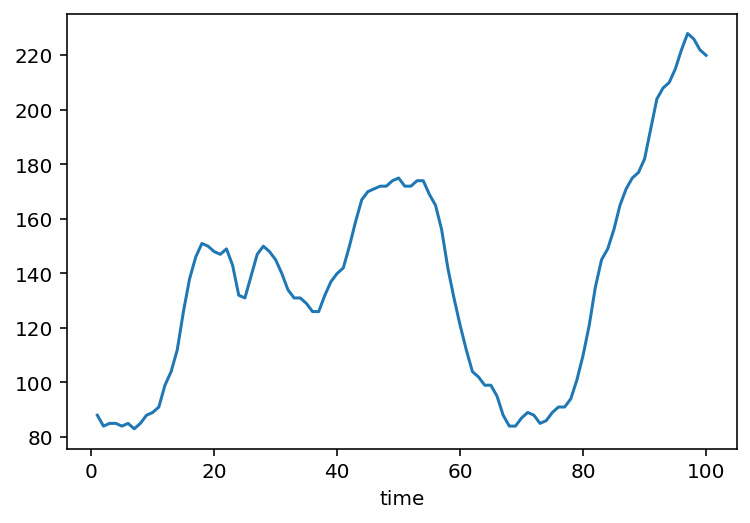

In [5]:
data = pd.Series(df['WWWusage'])
data.index = pd.Index(df['time'])
data.plot()



/usr/local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


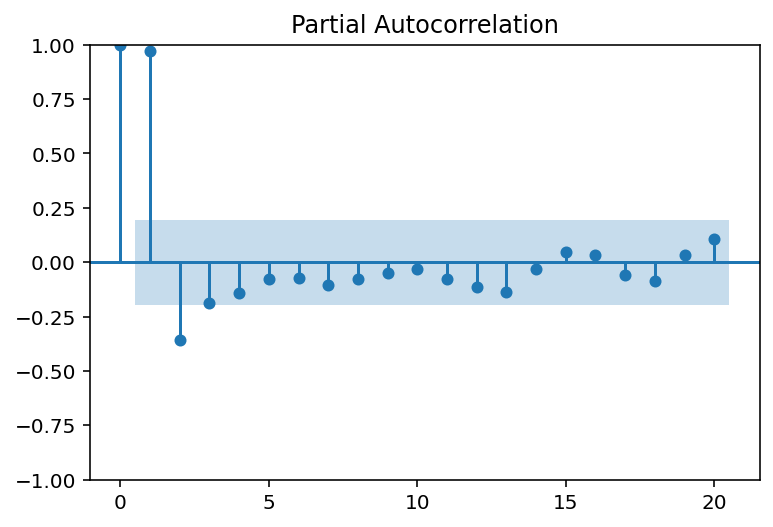

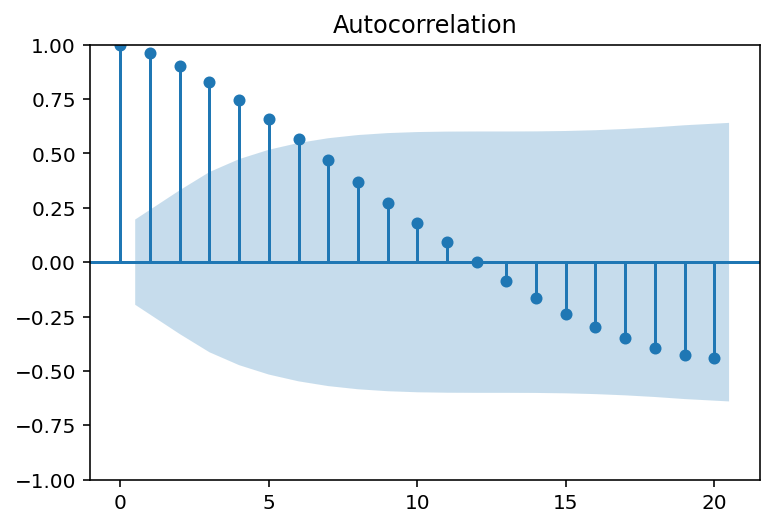

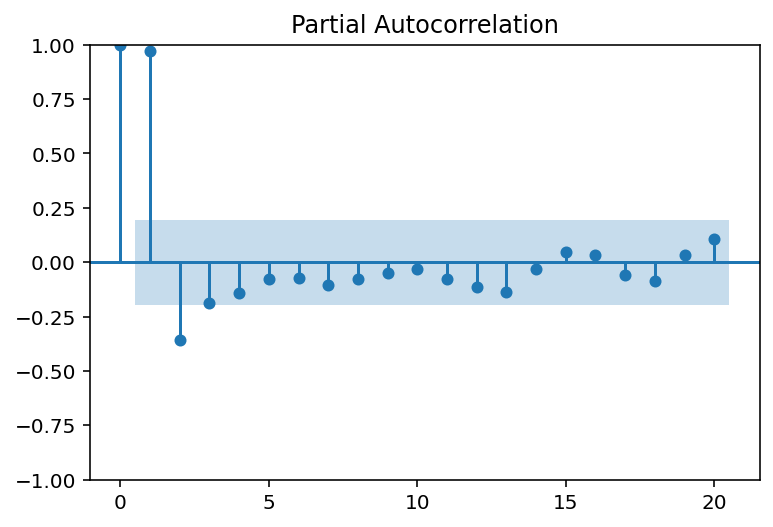

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plot_pacf(data)

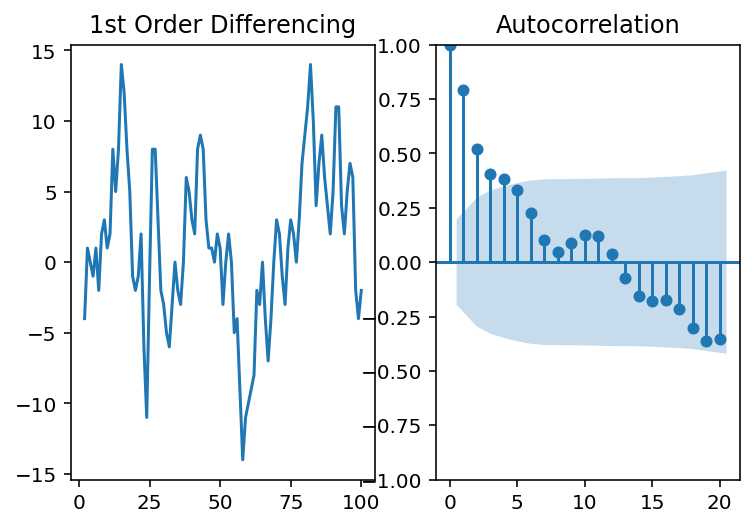

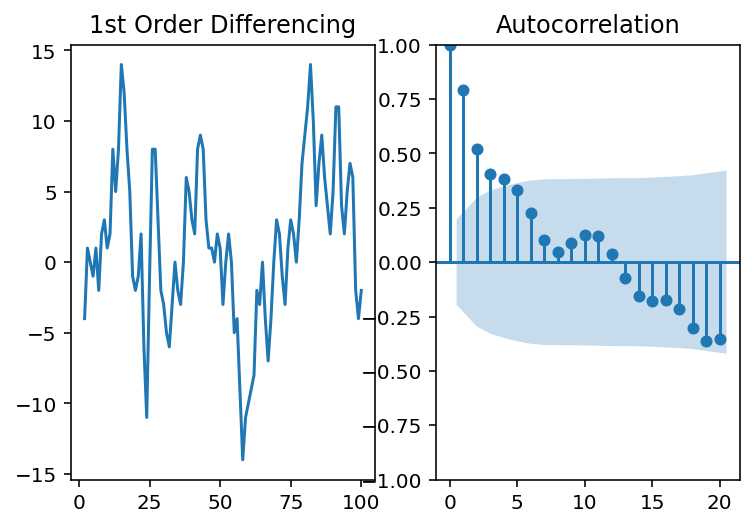

In [7]:
import matplotlib.pyplot as plt

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(data.diff())

ax2 = f.add_subplot(122)
plot_acf(data.diff().dropna(), ax=ax2)

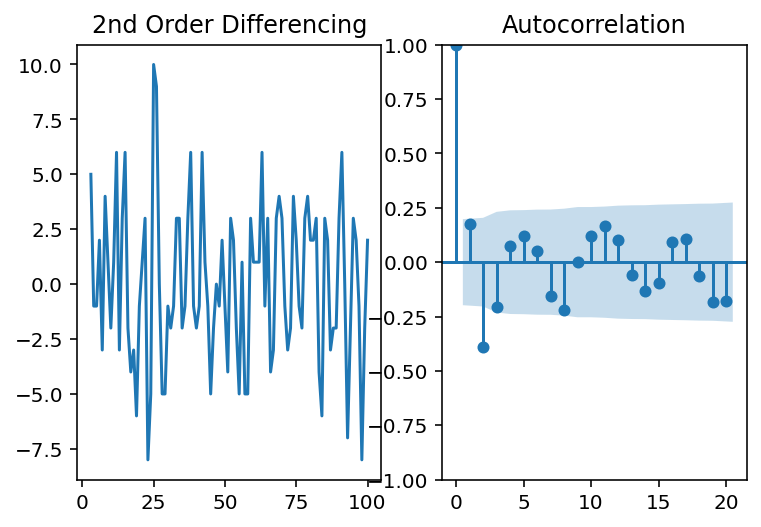

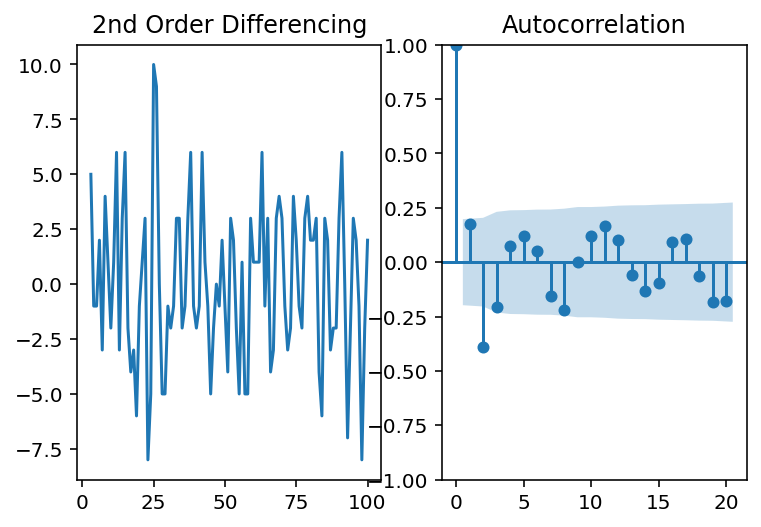

In [8]:
import matplotlib.pyplot as plt

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(data.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(data.diff().diff().dropna(), ax=ax2)

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.diff().dropna())

output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"], columns=['value'])
output['value']['Test Statistic Value'] = result[0]
output['value']['p-value'] = result[1]
output['value']['Lags Used'] = result[2]
output['value']['Number of Observations Used'] = result[3]
output['value']['Critical Value(1%)'] = result[4]['1%']
output['value']['Critical Value(5%)'] = result[4]['5%']
output['value']['Critical Value(10%)'] = result[4]['10%']
output

,value
Test Statistic Value,-2.722238
p-value,0.070268
Lags Used,2
Number of Observations Used,96
Critical Value(1%),-3.500379
Critical Value(5%),-2.892152
Critical Value(10%),-2.5831


In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.diff().diff().dropna())

output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"], columns=['value'])
output['value']['Test Statistic Value'] = result[0]
output['value']['p-value'] = result[1]
output['value']['Lags Used'] = result[2]
output['value']['Number of Observations Used'] = result[3]
output['value']['Critical Value(1%)'] = result[4]['1%']
output['value']['Critical Value(5%)'] = result[4]['5%']
output['value']['Critical Value(10%)'] = result[4]['10%']
output

,value
Test Statistic Value,-9.929762
p-value,0.0
Lags Used,1
Number of Observations Used,96
Critical Value(1%),-3.500379
Critical Value(5%),-2.892152
Critical Value(10%),-2.5831


/usr/local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


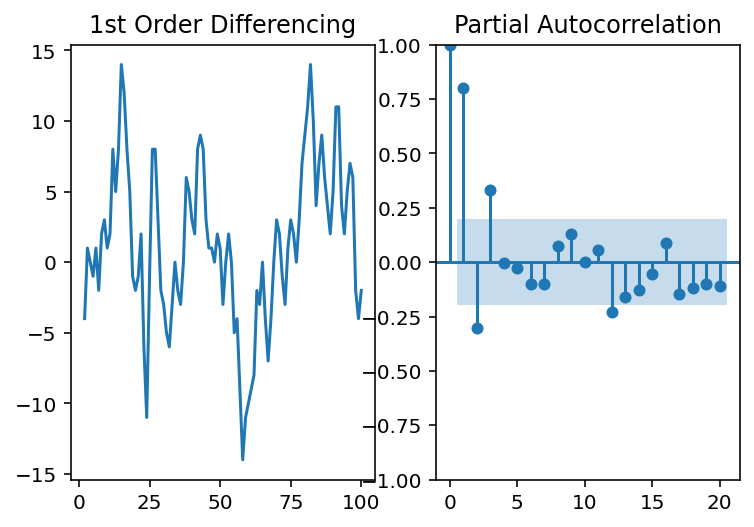

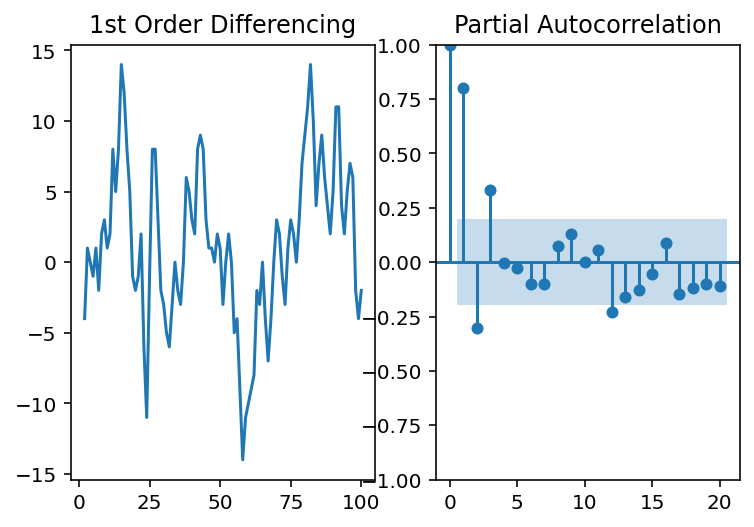

In [11]:
import matplotlib.pyplot as plt

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(data.diff())

ax2 = f.add_subplot(122)
plot_pacf(data.diff().dropna(), ax=ax2)

/usr/local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


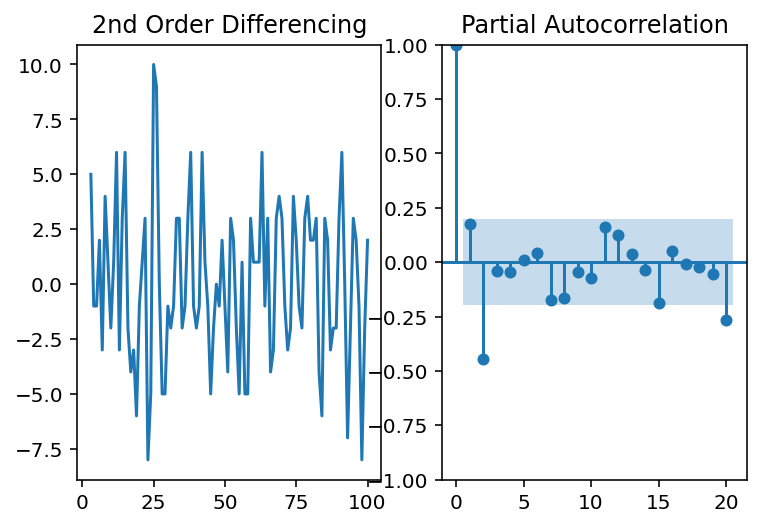

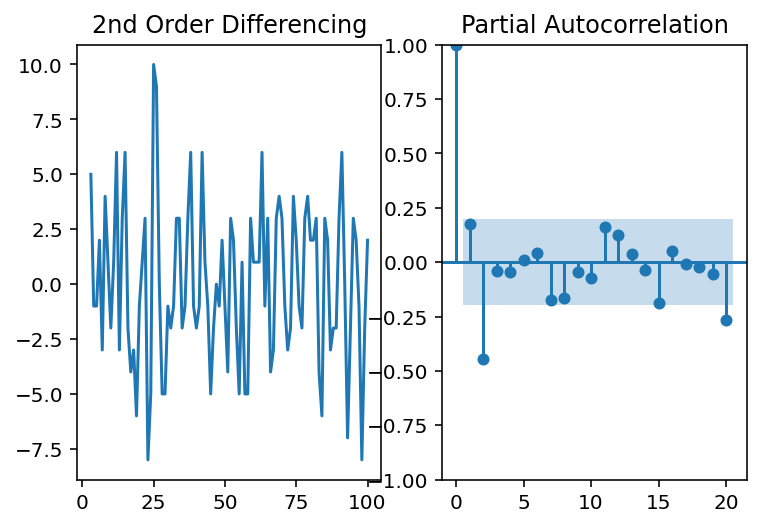

In [12]:
import matplotlib.pyplot as plt

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(data.diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(data.diff().diff().dropna(), ax=ax2)

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               WWWusage   No. Observations:                  100
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -254.126
Date:                Sat, 18 Mar 2023   AIC                            516.253
Time:                        21:38:44   BIC                            526.633
Sample:                             0   HQIC                           520.453
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6976      0.130      5.365      0.000       0.443       0.952
ma.L1          0.4551      0.169      2.699      0.007       0.125       0.786
ma.L2         -0.0664      0.157     -0.424      0.6

In [14]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1,2,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               WWWusage   No. Observations:                  100
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -252.594
Date:                Sat, 18 Mar 2023   AIC                            513.189
Time:                        21:38:44   BIC                            523.529
Sample:                             0   HQIC                           517.371
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6531      0.103      6.360      0.000       0.452       0.854
ma.L1         -0.4746      7.436     -0.064      0.949     -15.048      14.099
ma.L2         -0.5252      3.883     -0.135      0.8

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [15]:
import pmdarima as pm

auto_arima = pm.auto_arima(data, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [16]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(2,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               WWWusage   No. Observations:                  100
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -258.246
Date:                Sat, 18 Mar 2023   AIC                            526.492
Time:                        21:38:48   BIC                            539.518
Sample:                             0   HQIC                           531.764
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.0077     21.960      6.512      0.000      99.967     186.049
ar.L1          1.6613      0.088     18.862      0.000       1.489       1.834
ar.L2         -0.6793      0.089     -7.645      0.0

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:
model = ARIMA(data, order=(1,2,2))
model_fit = model.fit()

predict = model_fit.predict(dynamic=False)
predict

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


time
1        0.000000
2      132.000414
3       79.999734
4       87.117930
5       83.121876
          ...    
96     220.137544
97     228.015047
98     232.385470
99     221.751588
100    219.899243
Name: predicted_mean, Length: 100, dtype: float64

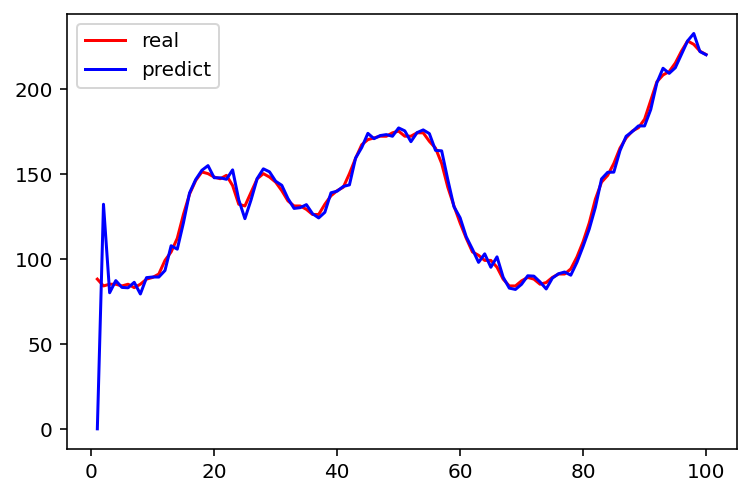

In [18]:
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.plot(data, color='red', label='real')
plt.plot(predict, color='blue', label='predict')
plt.legend(loc='best')
plt.show()